## 1. Setup and Imports ##

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

## 2. Load Dataset ##

In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df = df.rename(columns={'HeartDiseaseorAttack':'cardiac_arrest'})

In [ ]:
df = df.drop(columns=['PhysActivity','AnyHealthcare','Education','Income'], axis=1)

In [ ]:
df.shape

(253680, 18)

In [ ]:
df.head()

,cardiac_arrest,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


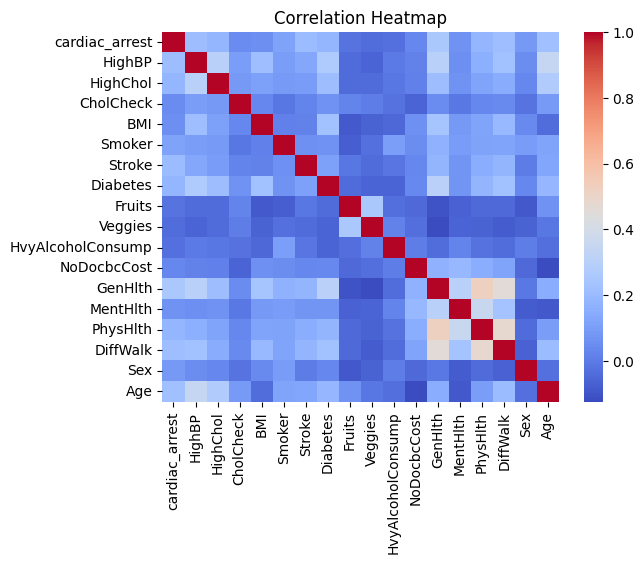

In [ ]:
# Visualize Correlation Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Visualize stats
df.describe()

,cardiac_arrest,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.634256,0.811420,0.056197,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.481639,0.391175,0.230302,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


## 3. Building The model ##



*   logistic regression: <br>
    commonly used for binary classification tasks (predicting 0 - 1)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

y = df['cardiac_arrest']

x= df.drop(columns='cardiac_arrest', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standardization: Standardization of a dataset is a common requirement for many machine learning estimators:
#they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
model=StandardScaler()

new_data=model.fit_transform(x_test)

x_test=pd.DataFrame(new_data)


new_data=model.fit_transform(x_train)

x_train=pd.DataFrame(new_data)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


model=LogisticRegression()


model.fit(x_train,y_train)


pred=model.predict(x_test)



## 4. Evaluating the Model ##

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     46004
         1.0       0.55      0.13      0.21      4732

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



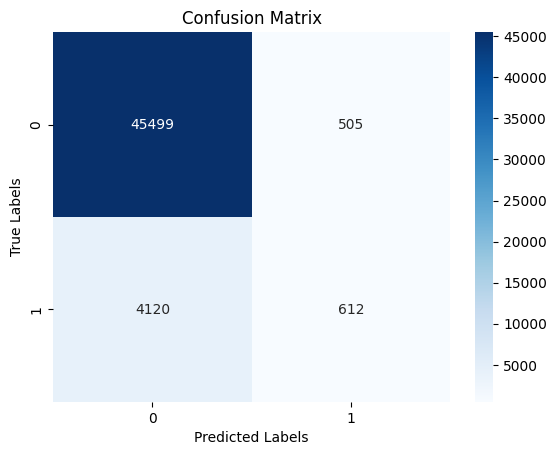

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels stored in y_test and predicted labels stored in pred

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()